#**(6) ADA-BOOST(Supervised learning,Classification & Regression problems Based)**

-  AdaBoost or Adaptive Boosting is nothing but the forest of **stumps(Decision tree having one root and two leaves)** rather than trees.

- Boosting– It combines weak learners into strong learners by creating **sequentiallearning(mistakes of previous classifier are learned by their successors) models** such that the final model has the highest accuracy.Here **Voting is done on the basis of accuracy  of sub-modul.**

- AdaBoost classifier builds a strong classifier by combining multiple poorly performing classifiers so that you will get high accuracy strong classifier. 



## **AdaBoost algorithm working**
- **Step1:** At first,Initially  assign same weights to each data point in the dataset.

- Sample weight = 1/N,Where N = Number of records

- **Step2:** After that randomly pass  data points to First classifier, Suppose first classifier misclassified some data points. Then assigns the higher weight to wrong classified data points so that in the next iteration those data points will get the high probability of selection  into next classifier.

- **Step3:** The second classifier  then picks up the wrong prediction data from the first classifier with some other data points from orginal dataset randomly then train the module.In each step we have to update the weight of  misclassified data points and correctly classified data points.


- **Step5:** This process iterate until the complete training data fits without any error.
- **Step6:** Finally make "voting" on the basis of accuracy   of various classifier.


- **Total Error** = Weights of misclassified records
- **Performance of the stump(α)** = ½ log (1 – Total error/Total error)
- **New weight(For misclassified records)** = Weight * $e^{performance}$ 
- **New weight(For correctly classified)** = Weight * $e^{-performance}$

- Here the model (base learners) used in AdaBoost is decision tree. Decision trees are created with one depth which has one node and two leaves also referred to as stumps.

##**Model building in Scikit-learn**

- Let's build the diabetes prediction model.
- Here, we are going to predict diabetes using ADA BOOST - Classifier.
- Let's first load the required Pima Indian Diabetes dataset using the pandas' read CSV function.

In [140]:
from google.colab import drive     #mount your Google Drive in your virtual machine(VM).
drive.mount('/gdrive')              #Access  the data  drive because of different server of colab and drive.

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [141]:
# Load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import AdaBoostClassifier # Import AdaBoostClassifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

In [142]:
pima=pd.read_csv('/gdrive/My Drive/ML Project /Feature Engineering /4.ML Algorithms/diabetes.csv',quoting=3)
                                 #Read data file with path location step by step path location from My Drive.

In [143]:
pima.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Now,we need to divide the given columns into two types of variables dependent(or target variable) and independent variable(or feature variables).

In [144]:
#split dataset in features and target variable
feature_cols = ['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin', 'BMI','DiabetesPedigreeFunction','Age']
X = pima[feature_cols] # Features/independent variables
y = pima.Outcome # Target variable/dependent variables


# or Also we can write above code as this also. 
X = pima.drop('Outcome', axis=1)   #Features/independent variables
y = pima['Outcome']               # Target variable/dependent variables

Let's split dataset by using function train_test_split().

In [145]:
# split X and y into training and testing sets
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

Since, we have different range of features so we need to apply Feature Scaling techniques to bring features in same scale.

In [146]:
#Feature Scaling techniques to bring features in same scale.
from sklearn.preprocessing import RobustScaler # Or we can also use StandardScaler,MinMaxScaler depending on the dataset.
rb = RobustScaler()  
X_train = rb.fit_transform(X_train)
X_test = rb.transform(X_test)

pd.DataFrame(X_train )   ##Convert numpy array generated by sklearn libraries to orginal dataframe.
pd.DataFrame(X_test )    ##Convert numpy array generated by sklearn libraries to orginal dataframe.

,0,1,2,3,4,5,6,7
0,0.6,-0.475,-0.8750,0.31250,1.193798,0.206186,0.150943,0.823529
1,-0.2,-0.125,0.1875,0.28125,-0.279070,0.381443,-0.609164,-0.470588
2,-0.2,-0.225,-0.5000,-0.71875,-0.279070,-0.123711,-0.582210,-0.470588
3,1.0,-0.250,0.5000,-0.71875,-0.279070,-0.762887,1.299191,0.294118
4,0.8,0.475,1.1250,-0.71875,-0.279070,-0.216495,-0.442049,1.235294
...,...,...,...,...,...,...,...,...
226,-0.6,0.050,-4.5000,-0.71875,-0.279070,0.041237,-0.628032,-0.294118
227,0.2,-0.200,-0.5000,0.65625,0.488372,0.288660,1.431267,-0.176471
228,-0.6,0.250,0.5000,0.43750,1.348837,0.443299,1.159030,-0.352941
229,0.6,-0.300,-0.1250,0.28125,0.248062,-0.123711,-0.679245,0.470588


Let's create the AdaBoost Model using Scikit-learn.AdaBoost uses Decision Tree Classifier as default Classifier.

Weight applied to each classifier at each boosting iteration. A higher learning rate increases the contribution of each classifier. There is a trade-off between the learning_rate and n_estimators parameters.



In [147]:
# Create adaboost classifer object
clf= AdaBoostClassifier(n_estimators=50,learning_rate=1)
# Train Adaboost Classifer
clf.fit(X_train, y_train)

AdaBoostClassifier(learning_rate=1)

After training, check the accuracy using actual and predicted values.

In [148]:
#Predict the response for test dataset
y_pred=clf.predict(X_test)
pd.DataFrame(y_pred)        ##Convert numpy array generated by sklearn libraries to orginal dataframe.

,0
0,0
1,0
2,0
3,0
4,1
...,...
226,0
227,0
228,0
229,0


Model Evaluation using Confusion Matrix

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


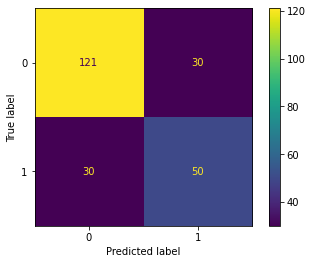

In [149]:
from sklearn.metrics import plot_confusion_matrix
display = plot_confusion_matrix(clf,X_test,y_test)
plt.show()

In [150]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.7402597402597403


In [151]:
from sklearn.metrics import precision_score
precision = precision_score(y_test, y_pred)
print(precision)

0.625


In [152]:
from sklearn.metrics import recall_score
recall = recall_score(y_test, y_pred)
print(recall)

0.625


In [153]:
from sklearn.metrics import f1_score 
f1_score = f1_score(y_test, y_pred)
print(f1_score)

0.625
